In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("AppleStore.csv")
df.head(3)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [4]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    # Эта фича - не числовая, а порядковая, но мы все равно возьмем ее как числовую для удобства
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = ["user_rating"]

cols = num_cols + cat_cols + target_col
cols
data = df[cols]
data["cont_rating"]

0        4+
1        4+
2        4+
3       12+
4        4+
       ... 
7192     4+
7193     4+
7194     9+
7195    12+
7196     4+
Name: cont_rating, Length: 7197, dtype: object

In [5]:
data = df[cols]
data["cont_rating"] = data["cont_rating"].replace("\+", "", regex=True).astype("int")
data

D:\_Work\_Projects\_Conda\School\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5
...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,38,5,1,4,USD,Games,4.5
7193,120760320,0.00,30,30,38,0,1,4,USD,Games,4.5
7194,111322112,1.99,15,0,37,1,1,9,USD,Utilities,4.5
7195,97235968,0.00,85,32,38,0,2,12,USD,Games,4.5


In [6]:
data.isna().sum()


size_bytes          0
price               0
rating_count_tot    0
rating_count_ver    0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
cont_rating         0
currency            0
prime_genre         0
user_rating         0
dtype: int64

In [7]:
for cat in cat_cols:
    print(data[cat].unique())
    print(data[cat].value_counts())
    print()

['USD']
USD    7197
Name: currency, dtype: int64

['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [8]:
data.drop(columns="currency")
cols.remove("currency")

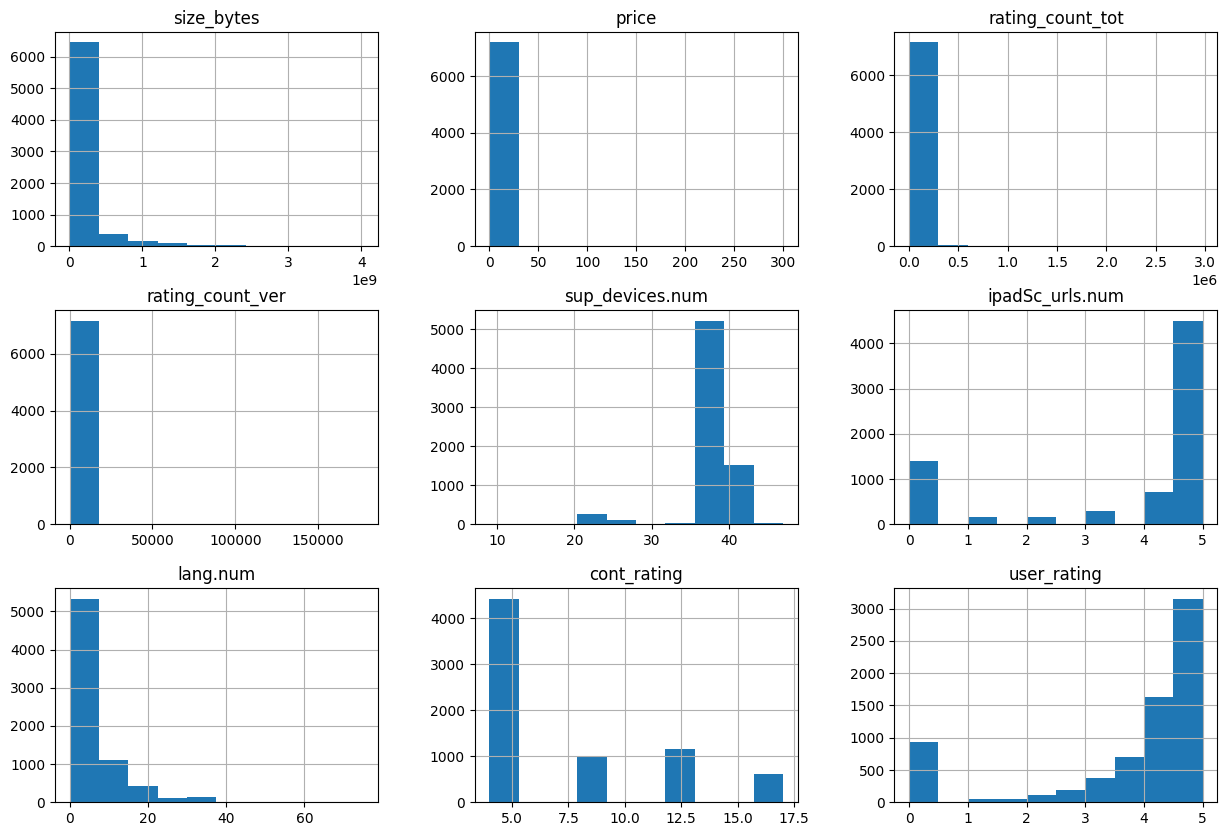

In [9]:
data.hist(column=cols, figsize=(15,10))
None

In [10]:
data.corr().style.background_gradient().set_precision(2)


D:\_Work\_Projects\_Conda\School\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1.00,0.18,0.00,0.01,-0.12,0.15,0.00,0.14,0.07
price,0.18,1.00,-0.04,-0.02,-0.12,0.07,-0.01,-0.03,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.01,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.04,0.02,0.01,0.00,0.07
sup_devices.num,-0.12,-0.12,0.01,0.04,1.00,-0.04,-0.04,0.02,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.04,1.00,0.09,-0.11,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.04,0.09,1.00,-0.07,0.17
cont_rating,0.14,-0.03,0.01,0.00,0.02,-0.11,-0.07,1.00,-0.10
user_rating,0.07,0.05,0.08,0.07,-0.04,0.27,0.17,-0.10,1.00


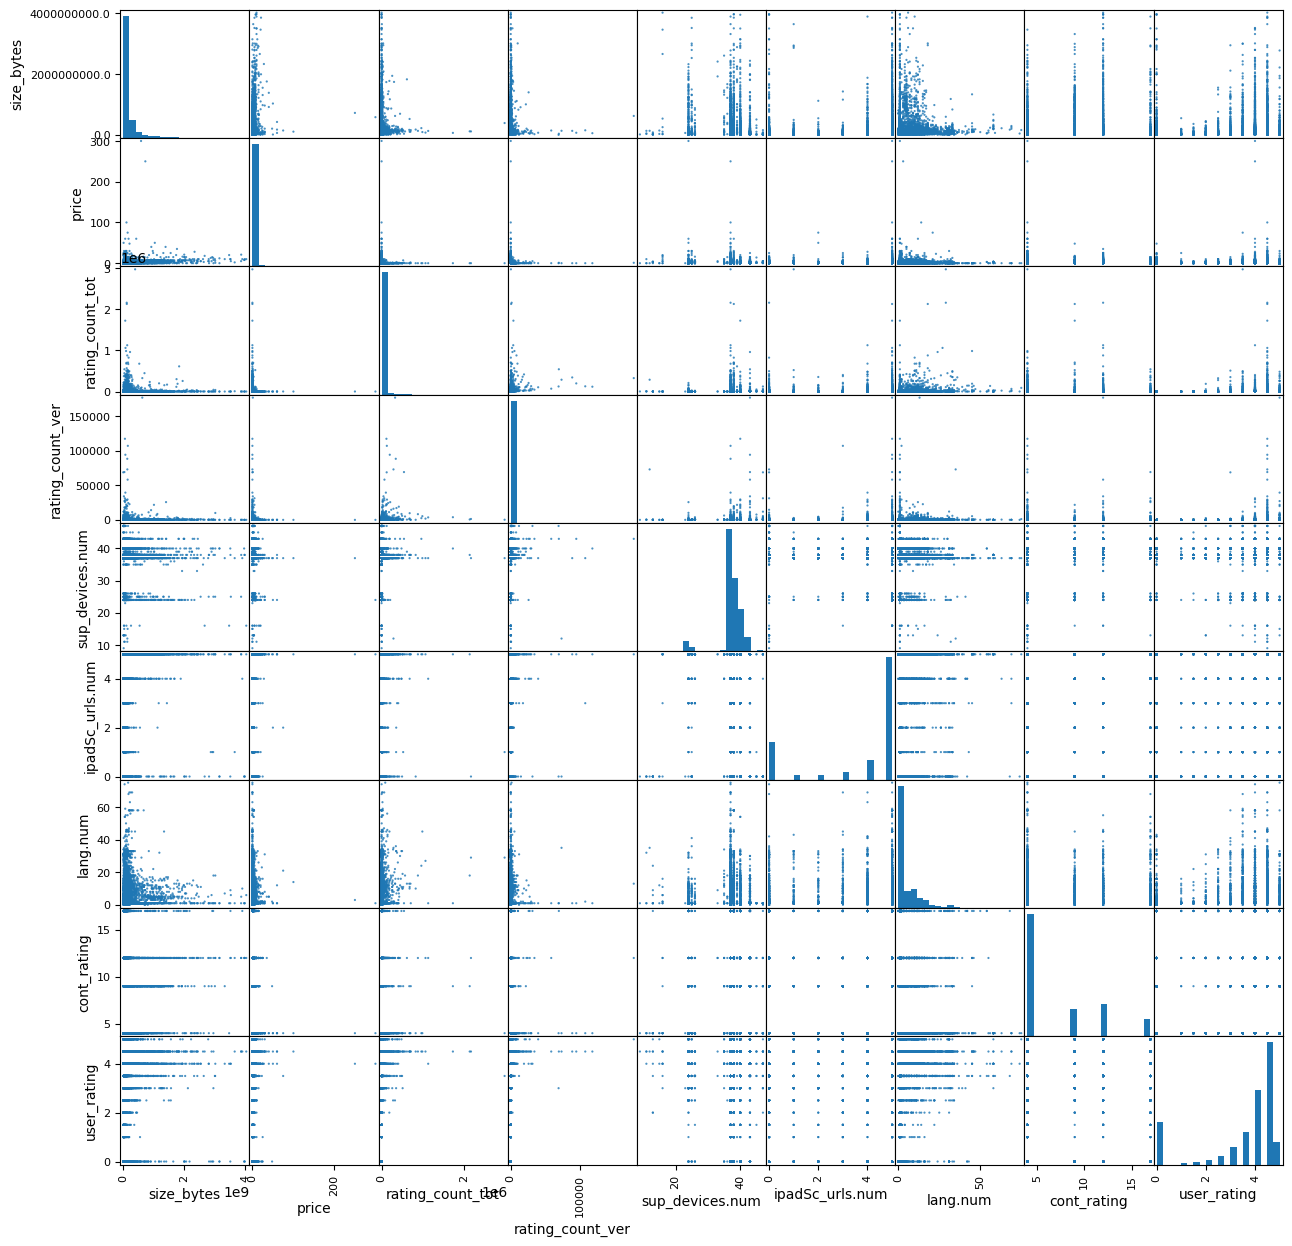

In [11]:
pd.plotting.scatter_matrix(data, figsize=(15, 15),  marker='.', hist_kwds={'bins': 20}, s=10, alpha=.8)
# , y=data[target_col], figsize=(15, 15), marker='o',
#                         hist_kwds={'bins': 20}, s=10, alpha=.8
None

In [12]:
test_df = pd.DataFrame.from_dict({"z": [2,3,2,3,4,2,3],"f": ["2","3","2","3","4","2","3"], "categorical":["a","b", "c","a","b","a","c"]})
test_df

,z,f,categorical
0,2,2,a
1,3,3,b
2,2,2,c
3,3,3,a
4,4,4,b
5,2,2,a
6,3,3,c


In [13]:
pd.get_dummies(test_df, columns=["categorical"])

,z,f,categorical_a,categorical_b,categorical_c
0,2,2,1,0,0
1,3,3,0,1,0
2,2,2,0,0,1
3,3,3,1,0,0
4,4,4,0,1,0
5,2,2,1,0,0
6,3,3,0,0,1


In [14]:
data = pd.get_dummies(data, columns=cat_cols)
data

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,currency_USD,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,100788224,3.99,21292,26,38,5,10,4,4.0,1,...,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,26,37,5,23,4,4.0,1,...,0,0,1,0,0,0,0,0,0,0
2,100524032,0.00,188583,2822,37,5,3,4,3.5,1,...,0,0,0,0,0,0,0,0,0,1
3,128512000,0.00,262241,649,37,5,9,12,4.0,1,...,0,0,0,0,1,0,0,0,0,0
4,92774400,0.00,985920,5320,37,5,45,4,4.5,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,38,5,1,4,4.5,1,...,0,0,0,0,0,0,0,0,0,0
7193,120760320,0.00,30,30,38,0,1,4,4.5,1,...,0,0,0,0,0,0,0,0,0,0
7194,111322112,1.99,15,0,37,1,1,9,4.5,1,...,0,0,0,0,0,0,0,0,1,0
7195,97235968,0.00,85,32,38,0,2,12,4.5,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
cat_cols_new = []
for column in cat_cols:
#     for d_c in data.columns:
#         print("d_c: ", d_c)
#         print("column: ", column)
#         print("d_c startswith: ", d_c.startswith(column))
    cat_cols_new += filter(lambda x: x.startswith(column), data.columns)
cat_cols = cat_cols_new
cat_cols

['currency_USD',
 'prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather']

In [39]:
norm_data = data.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# Не ясно зачем на семинаре нормировали категориальные признаки 
scaler.fit(norm_data[num_cols + cat_cols])
norm_data[num_cols + cat_cols] = scaler.transform(norm_data[num_cols+ cat_cols])
norm_data[num_cols + cat_cols]


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency_USD,prime_genre_Book,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,0.024892,0.013300,0.007158,0.000147,0.763158,1.0,0.133333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.039248,0.000000,0.054145,0.000147,0.736842,1.0,0.306667,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024826,0.000000,0.063396,0.015939,0.736842,1.0,0.040000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.031779,0.000000,0.088158,0.003666,0.736842,1.0,0.120000,0.615385,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.022901,0.000000,0.331438,0.030048,0.736842,1.0,0.600000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,0.031315,0.000000,0.000048,0.000424,0.763158,1.0,0.013333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7193,0.029853,0.000000,0.000010,0.000169,0.763158,0.0,0.013333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7194,0.027509,0.006634,0.000005,0.000000,0.736842,0.2,0.013333,0.384615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7195,0.024009,0.000000,0.000029,0.000181,0.763158,0.0,0.026667,0.615385,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data[num_cols + cat_cols]

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency_USD,prime_genre_Book,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,100788224,3.99,21292,26,38,5,10,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,26,37,5,23,4,1,0,...,0,0,1,0,0,0,0,0,0,0
2,100524032,0.00,188583,2822,37,5,3,4,1,0,...,0,0,0,0,0,0,0,0,0,1
3,128512000,0.00,262241,649,37,5,9,12,1,0,...,0,0,0,0,1,0,0,0,0,0
4,92774400,0.00,985920,5320,37,5,45,4,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,38,5,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
7193,120760320,0.00,30,30,38,0,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
7194,111322112,1.99,15,0,37,1,1,9,1,0,...,0,0,0,0,0,0,0,0,1,0
7195,97235968,0.00,85,32,38,0,2,12,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
norm_data[num_cols + cat_cols]

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency_USD,prime_genre_Book,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,0.024892,0.013300,0.007158,0.000147,0.763158,1.0,0.133333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.039248,0.000000,0.054145,0.000147,0.736842,1.0,0.306667,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024826,0.000000,0.063396,0.015939,0.736842,1.0,0.040000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.031779,0.000000,0.088158,0.003666,0.736842,1.0,0.120000,0.615385,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.022901,0.000000,0.331438,0.030048,0.736842,1.0,0.600000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,0.031315,0.000000,0.000048,0.000424,0.763158,1.0,0.013333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7193,0.029853,0.000000,0.000010,0.000169,0.763158,0.0,0.013333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7194,0.027509,0.006634,0.000005,0.000000,0.736842,0.2,0.013333,0.384615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7195,0.024009,0.000000,0.000029,0.000181,0.763158,0.0,0.026667,0.615385,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data[num_cols], data[target_col], test_size=0.2)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((5757, 8), (5757, 1), (1440, 8), (1440, 1))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

def metrics(y_pred, y):
    print(f"R**2: {r2_score(y_pred,y)}")
    print(f"MSE: {mean_squared_error(y_pred,y)}")
metrics([1,1.1],[0.9,0.95])

R**2: -5.499999999999996
MSE: 0.016250000000000018


In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)
metrics(y_pred, y_val)

R**2: -8.278040229678554
MSE: 2.20571387659222


In [21]:
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate

In [22]:
cross_validate(LinearRegression(), x_train, y_train, cv=5, scoring={
    "r2_score": make_scorer(r2_score), 
    "mean_squared_error": make_scorer(mean_squared_error)
})

{'fit_time': array([0.00499749, 0.00399804, 0.00499654, 0.00413513, 0.00398374]),
 'score_time': array([0.00399685, 0.00399756, 0.00299859, 0.00301456, 0.00301218]),
 'test_r2_score': array([0.09022857, 0.11575366, 0.11307028, 0.11260306, 0.0946665 ]),
 'test_mean_squared_error': array([2.12386514, 1.90640014, 2.02883045, 1.980509  , 2.12486047])}

In [23]:
cross_validate(KNeighborsRegressor(), x_train, y_train, cv=5, 
               scoring={
                   "r2_score": make_scorer(r2_score),
                   "MSE": make_scorer(mean_squared_error)
               }
               
              )

{'fit_time': array([0.01200676, 0.01099825, 0.01199746, 0.01197886, 0.010993  ]),
 'score_time': array([0.00699568, 0.00699091, 0.00699162, 0.00599718, 0.00699687]),
 'test_r2_score': array([-0.1200444 , -0.1945968 , -0.14695102, -0.15926234, -0.14595438]),
 'test_MSE': array([2.61474826, 2.57550347, 2.62362294, 2.58726325, 2.68960904])}

In [24]:
from sklearn.model_selection import GridSearchCV
gri_search = GridSearchCV(KNeighborsRegressor(),
                          [{"n_neighbors": [1,2,3,4,4,5]}],
                          cv=5,
                          verbose=7
                         )
gri_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................n_neighbors=1;, score=-0.832 total time=   0.0s
[CV 2/5] END ....................n_neighbors=1;, score=-0.949 total time=   0.0s
[CV 3/5] END ....................n_neighbors=1;, score=-0.866 total time=   0.0s
[CV 4/5] END ....................n_neighbors=1;, score=-0.801 total time=   0.0s
[CV 5/5] END ....................n_neighbors=1;, score=-0.866 total time=   0.0s
[CV 1/5] END ....................n_neighbors=2;, score=-0.346 total time=   0.0s
[CV 2/5] END ....................n_neighbors=2;, score=-0.505 total time=   0.0s
[CV 3/5] END ....................n_neighbors=2;, score=-0.402 total time=   0.0s
[CV 4/5] END ....................n_neighbors=2;, score=-0.412 total time=   0.0s
[CV 5/5] END ....................n_neighbors=2;, score=-0.420 total time=   0.0s
[CV 1/5] END ....................n_neighbors=3;, score=-0.208 total time=   0.0s
[CV 2/5] END ....................n_neighbors=3;, 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 4, 5]}], verbose=7)

In [25]:
y_pred = gri_search.predict(x_val)
metrics(y_pred, y_val)
print(gri_search.best_score_)
print(gri_search.best_params_)
print(gri_search.best_estimator_)



R**2: -3.999633380816581
MSE: 2.7568888888888887
-0.15336178912505932
{'n_neighbors': 5}
KNeighborsRegressor()


In [26]:
x_train

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating
3600,60309504,1.99,53,0,37,0,1,4
6362,196617216,0.00,1,1,37,5,1,4
3576,61336576,0.00,60,20,40,5,1,4
5716,29554688,9.99,353,28,37,5,1,4
6030,157614080,0.00,6116,291,38,5,1,9
...,...,...,...,...,...,...,...,...
6461,92825600,0.99,87,37,37,3,1,4
481,3462266,0.99,8946,1776,43,0,1,4
2159,118697984,0.00,3546,62,24,5,1,4
4863,261120000,1.99,76,20,40,5,1,4


In [31]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5)
kfolds.split(x_train)

<generator object _BaseKFold.split at 0x000001D3F6F9ACC8>

In [35]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5)
print(1)
for train_ind, test_ind in kfolds.split(x_train):
    print(x_train)
    print(len(train_ind), len(test_ind))
    print(x_train[train_ind])
#     kflod_x_train = x_train[[train_ind]]
    
#    print(train_ind.shape, x_train[[train_ind]].shape)
#     kflod_x_test = x_test[test_ind]
#     kflod_y_train = y_train[train_ind]
#     kflod_y_test = y_test[test_ind]


1
      size_bytes  price  rating_count_tot  rating_count_ver  sup_devices.num  \
3600    60309504   1.99                53                 0               37   
6362   196617216   0.00                 1                 1               37   
3576    61336576   0.00                60                20               40   
5716    29554688   9.99               353                28               37   
6030   157614080   0.00              6116               291               38   
...          ...    ...               ...               ...              ...   
6461    92825600   0.99                87                37               37   
481      3462266   0.99              8946              1776               43   
2159   118697984   0.00              3546                62               24   
4863   261120000   1.99                76                20               40   
2185    72974336   2.99              1259               415               38   

      ipadSc_urls.num  lang.num  cont

KeyError: "None of [Int64Index([1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161,\n            ...\n            5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756],\n           dtype='int64', length=4605)] are in the [columns]"